In [14]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
import keras
from tensorflow.keras import Sequential
import os
import numpy as np
import pandas as pd

In [2]:
names = [
 'music',
 'brother',
 'ocean',
 'i love you',
 'dog',
 'polite',
 'milk',
 'money',
 'coffee',
 'door']

In [3]:
len(names)

10

In [6]:
import glob

train_df = pd.DataFrame()
test_df = pd.DataFrame()
i = 0
for label in names:
    files = glob.glob(f"/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/training_models/mediapipe/reformatting-the-data/data_25_labels/{label}/*.csv")
    for f in files:
        csv = pd.read_csv(f)
        if i%5 != 0:    
            train_df = pd.concat([train_df, csv])
        else:
            test_df = pd.concat([test_df, csv])
        i += 1
        

print(train_df.shape, test_df.shape)

(19101, 301) (5329, 301)


In [7]:
def seperate_label(df):
    df_features = df.copy()

    df_labels = df_features.pop("class")

    df_features = np.array(df_features)
    # df_labels = np.array(df_labels)
    print(df_features.shape)
    print(df_labels.shape, type(df_labels))
    return df_features, df_labels

In [8]:
X_train, Y_train = seperate_label(train_df)

(19101, 300)
(19101,) <class 'pandas.core.series.Series'>


In [9]:
X_val, Y_val = seperate_label(test_df)

(5329, 300)
(5329,) <class 'pandas.core.series.Series'>


In [10]:
dicti = {names[i]: i for i in range(len(names))}
dicti

{'music': 0,
 'brother': 1,
 'ocean': 2,
 'i love you': 3,
 'dog': 4,
 'polite': 5,
 'milk': 6,
 'money': 7,
 'coffee': 8,
 'door': 9}

In [11]:
def reformat_label(df_labels):    
#should be between 0 and 3
    # for element in df_labels:
    #     element = dicti[element]

    def change_label(x):
        return dicti[x]

    df_labels = df_labels.apply(change_label)
    df_labels.head()
    return df_labels

Y_train = reformat_label(Y_train)
Y_val = reformat_label(Y_val)

In [12]:
Y_train, Y_val

(0     0
 1     0
 2     0
 3     0
 4     0
      ..
 49    9
 50    9
 51    9
 52    9
 53    9
 Name: class, Length: 19101, dtype: int64,
 0     0
 1     0
 2     0
 3     0
 4     0
      ..
 62    9
 63    9
 64    9
 65    9
 66    9
 Name: class, Length: 5329, dtype: int64)

In [13]:
#I have to make each label a single vector 
# I can just rotate (transpose, since now I have a single rolumn, I will make it into many rows)! 
Y_train = np.array([Y_train]).T
Y_val = np.array([Y_val]).T
print(Y_train.shape, Y_val.shape)

(19101, 1) (5329, 1)


In [15]:
from sklearn.utils import shuffle

X_train,Y_train = shuffle(X_train, Y_train, random_state=0)
X_val,Y_val = shuffle(X_val, Y_val, random_state=0)
X_train, Y_train

(array([[ 0.46710524,  0.37786728, -0.5233407 , ...,  0.82614565,
         -0.01049773,  0.        ],
        [ 0.51885402,  0.35000384, -0.84283555, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.5758189 ,  0.24245074, -0.43719378, ...,  0.98968548,
         -0.02040255,  0.        ],
        ...,
        [ 0.49153692,  0.33117181, -0.58112657, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.52043146,  0.23756535, -0.81144363, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.48301202,  0.23721303, -0.93980378, ...,  0.        ,
          0.        ,  0.        ]]),
 array([[1],
        [5],
        [1],
        ...,
        [6],
        [6],
        [1]]))

In [32]:
model = Sequential([
    Dense(units=256, activation='relu'),
    Dense(units=200, activation='relu',
          kernel_regularizer=keras.regularizers.l1_l2(0.01)),
    Dense(units=200, activation='relu',
          kernel_regularizer=keras.regularizers.l2(0.01)),
    Dense(units=10, activation='softmax')
])

In [33]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/training_models/mediapipe/Simple-Dense-Layers/regularized-10-labels.{epoch:02d}-{val_accuracy:.2f}",
    monitor='val_accuracy',
    verbose=0,
    save_best_only=True,
    save_weights_only=False,
    mode='auto',
    save_freq='epoch',
)

In [34]:
#cost function
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

model.compile(loss=SparseCategoricalCrossentropy(), optimizer=Adam(), metrics=["accuracy"])

In [36]:
history = model.fit(X_train,Y_train, epochs=20, batch_size=50, validation_data=(X_val, Y_val), callbacks=[checkpoint])

Epoch 1/20


2023-03-26 00:06:42.377644: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


383/383 [==============================] - ETA: 0s - loss: 5.7719 - accuracy: 0.2678

2023-03-26 00:06:47.152881: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: /Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/training_models/mediapipe/Simple-Dense-Layers/regularized-10-labels.01-0.34/assets
383/383 [==============================] - 7s 16ms/step - loss: 5.7719 - accuracy: 0.2678 - val_loss: 2.0682 - val_accuracy: 0.3355
Epoch 2/20
383/383 [==============================] - 5s 12ms/step - loss: 1.9356 - accuracy: 0.3380 - val_loss: 2.0342 - val_accuracy: 0.3408
Epoch 3/20
383/383 [==============================] - 4s 10ms/step - loss: 1.8377 - accuracy: 0.3718 - val_loss: 1.9167 - val_accuracy: 0.3374
Epoch 4/20
383/383 [==============================] - 4s 10ms/step - loss: 1.7747 - accuracy: 0.3932 - val_loss: 1.9422 - val_accuracy: 0.3639
Epoch 5/20
383/383 [==============================] - 4s 9ms/step - loss: 1.7150 - accuracy: 0.4215 - val_loss: 1.9337 - val_accuracy: 0.3477
Epoch 6/20
383/383 [==============================] - 4s 11ms/step - loss: 1.6429 - accuracy: 0.4645 - val_los

In [37]:
model.save("saved_model_10_labels")

INFO:tensorflow:Assets written to: saved_model_10_labels/assets


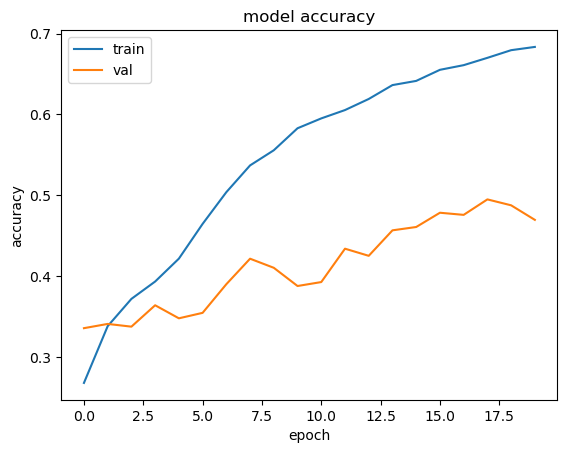

In [40]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('accuracy_10_labels.png')
plt.show()

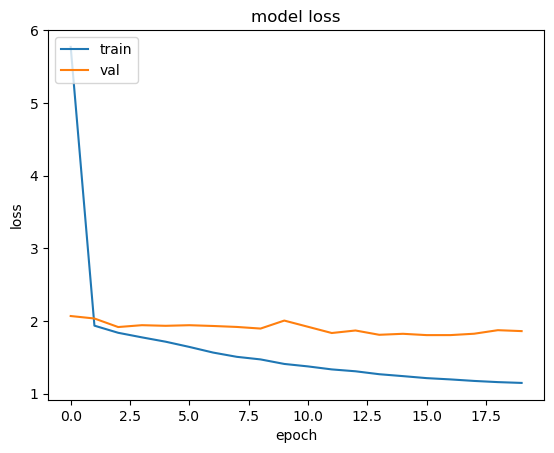

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('loss_10_labels.png')
plt.show()